<p style="font-size:36px;text-align:center"> <b>Self Drive Car Implemention Using Keras(Tensor FLow Framwork) Using "End-to-End Deep Learning for Self-Driving Cars" Network Architecture</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p>In a new automotive application, we have used convolutional neural networks (CNNs) to map the raw pixels from a front-facing camera to the steering commands for a self-driving car. This powerful end-to-end approach means that with minimum training data from humans, the system learns to steer, with or without lane markings, on both local roads and highways. The system can also operate in areas with unclear visual guidance such as parking lots or unpaved roads.</p>

<p>In this Project i am going to implement Nvidia End-to-End Deep Learning for Self-Driving Cars" Network Architecture(https://arxiv.org/pdf/1604.07316.pdf) and around 45,000 Data-set(https://github.com/SullyChen/driving-datasets)</p>


<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement
 <p>
1.appliedaicourse.com study videos

2.https://arxiv.org/pdf/1604.07316.pdf

3.https://devblogs.nvidia.com/deep-learning-self-driving-cars/

4.https://github.com/SullyChen/Autopilot-TensorFlow
<p>
  
<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Errors can be very costly.
*Regression problem

<h1>2. Deep Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://drive.google.com/file/d/1PZWa6H0i1PCH9zuYcIh5Ouk_p-9Gh58B/view

<p>- Taking Same data (https://github.com/SullyChen/driving-datasets) SullyChen used in his/her project</p>
<p> Size: 25 minutes = 25*60*30 = 45,000 images ~ 2.3 GB</p>
<p>We have One data.txt file which contains image id and steering angle and all images

<p>Sample data.txt</p>
<p>
 0.jpg 0.000000
</p><p>
1.jpg 0.000000
</p><p>
2.jpg 0.000000
 </p>
 
<h2>2.2. Mapping the real-world problem to an DL problem</h2>
<h3>2.2.1. Type of Deep Learning Problem</h3>
As using giving images we have to predict steering angle (real number)=> Regression problem

<h3>2.2.2. Performance Metric</h3>

Metric(s):
<p>
MSE(Mean Squared Error):
These error functions average all the mistakes made for each prediction, and if the prediction is far from the true value, then this distance is made more evident by the squaring operation
</p>
<h2>
2.3. Train, CV and Test Datasets
</h2>
Split the dataset Temporal(Time based split) into three parts train, cross validation and test with 60%,20%, 20% of data respectively
<p>Note:- first i trained model as above split, during training i absorve validation error is stucked around 0.278. I tried various hyperparameter tuning and model change but did not get better result. remeber its temporal split so decide for further resplit train test set as Train 70% and Test 30%</p>


<h1>Steps to Mount Google Drive with Google Colab </h1>
Going to Use Google Colab so first need to put data-set into one folder in google Drive.
Need to mount google drive with colab.
below stpes need to uncomment for first time 


In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
#unzip Autopilot folder as data is inside there
!unzip /content/drive/Car_data_set/Autopilot-TensorFlow-master.zip >temp.txt


In [0]:
!cp //content/drive/Autopilot-Te

In [9]:
!unzip /content/drive/Car_data_set/keras-steering-angle-visualizations-master.zip

Archive:  /content/drive/Car_data_set/keras-steering-angle-visualizations-master.zip
bd1203354ccbbef2f87a1bd77c12d101558e8b98
   creating: keras-steering-angle-visualizations-master/
  inflating: keras-steering-angle-visualizations-master/LICENSE  
  inflating: keras-steering-angle-visualizations-master/README.md  
  inflating: keras-steering-angle-visualizations-master/driving_data.py  
   creating: keras-steering-angle-visualizations-master/examples/
  inflating: keras-steering-angle-visualizations-master/examples/10123.jpg  
  inflating: keras-steering-angle-visualizations-master/examples/10123_occlusion_blurred.jpg  
  inflating: keras-steering-angle-visualizations-master/examples/1123_cam.jpg  
  inflating: keras-steering-angle-visualizations-master/examples/18123_cam.jpg  
  inflating: keras-steering-angle-visualizations-master/examples/18123_hypercolumns.jpg  
  inflating: keras-steering-angle-visualizations-master/examples/18123_hypercolumns_lastlayer.jpg  
  inflating: keras-s

In [0]:
!cp -r /content/Autopilot-TensorFlow-master/driving_dataset .

In [10]:
!python /content/Autopilot-TensorFlow-master/train.py

  File "/content/keras-steering-angle-visualizations-master/train.py", line 11
    print "Loaded model"
                       ^
SyntaxError: Missing parentheses in call to 'print'. Did you mean print(print "Loaded model")?



<h1>3. Exploratory Data Analysis</h1>
<h3>3.1. Import All required Classed first</h3>


In [10]:
import numpy as np
import pandas as pd
import os, shutil
from keras.models import Model
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D,BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense,Input
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from scipy import pi
import matplotlib.pyplot as plt
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D,GlobalMaxPooling2D
from keras.regularizers import l2
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
#!rm -rf /content/Autopilot-TensorFlow-master/val_driving_dataset
#!rm -rf /content/Autopilot-TensorFlow-master/train_driving_dataset

<h1>4 Data preprocessing</h1>


As you know by now, data should be formatted into appropriately preprocessed floatingpoint
tensors before being fed into the network. Currently, the data sits on a drive as
JPEG files, so the steps for getting it into the network are roughly as follows:

1 Read the picture files.

2 Decode the JPG content to RGB grids of pixels.

3 Convert these into floating-point tensors.

4 Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know,
neural networks prefer to deal with small input values).

<p>Notekeras has build in class ImageDataGenerator, under keras.preprocessing.image to handle data preprocessing, will use that</p>

<h2>3.1. Reading Data</h2>
<p>reading data.txt file and spliting into Train and Test Data set(Training 80% & Test  20%)</p>
<p>Note:- 80% Training Data will split later 20% Validation data during keras fit operation</p>

In [11]:
xs = []
ys = []
original_data_path = r"/content/Autopilot-TensorFlow-master/driving_dataset"
#train_data_path = r"/content/Autopilot-TensorFlow-master/train_driving_dataset"
#val_data_path = r"/content/Autopilot-TensorFlow-master/val_driving_dataset"
#test_data_path = r"/content/Autopilot-TensorFlow-master/test_driving_dataset"

#read data.txt
with open(original_data_path +"/data.txt") as f:
    for line in f:
        xs.append(original_data_path+"/" + line.split()[0])
        #the paper by Nvidia uses the inverse of the turning radius,
        #but steering wheel angle is proportional to the inverse of turning radius
        #so the steering wheel angle in radians is used as the output
        ys.append(float(line.split()[1]) * pi / 180)

#get number of images
num_images = len(xs)
val_start_point = int(len(xs) * 0.6)
val_end_point = int(len(xs) *0.8)
                      
train_xs = xs[:val_start_point]
train_ys = ys[:val_start_point]
val_xs = xs[val_start_point : val_end_point]
val_ys = ys[val_start_point : val_end_point]
test_xs = xs[val_end_point:]
test_ys = ys[val_end_point:]
print("Total Number of Data-set: "+str(num_images))
print("Total Number of Train Data-set: "+str(len(train_xs)))
print("Total Number of Validation Data-set: "+str(len(val_xs)))
print("Total Number of Test Data-set: "+str(len(test_xs)))



Total Number of Data-set: 45406
Total Number of Train Data-set: 27243
Total Number of Validation Data-set: 9081
Total Number of Test Data-set: 9082


In [12]:
image_height=66
image_width=100
channels = 3

train_dataset = np.ndarray(shape=(len(train_xs), image_height, image_width, channels),
                     dtype=np.float32)
val_dataset = np.ndarray(shape=(len(val_xs), image_height, image_width, channels),
                     dtype=np.float32)
test_dataset = np.ndarray(shape=(len(test_xs), image_height, image_width, channels),
                     dtype=np.float32)

i = 0
for file in train_xs:
    img = load_img(file, target_size=(image_height, image_width)) # this is a PIL image(PIL- Python Imaging Libaray)
    # Convert to Numpy Array
    x = img_to_array(img)  
    #x = x.reshape((66,100,1)) ---> not required we have given target_size in load_img
    # Normalize
    x = 1./255
    train_dataset[i] = x
    i += 1
    if i % 10000 == 0:
        print("%d images to array" % i)
print("All Train images to array!")


i = 0
for file in val_xs:
    img = load_img(file, target_size=(image_height, image_width)) # this is a PIL image(PIL- Python Imaging Libaray)
    # Convert to Numpy Array
    x = img_to_array(img)  
    #x = x.reshape((66,100,1)) ---> not required we have given target_size in load_img
    # Normalize
    x = 1./255
    val_dataset[i] = x
    i += 1
    if i % 10000 == 0:
        print("%d images to array" % i)
print("All validation images to array!")        

i = 0
for file in test_xs:
    img = load_img(file, target_size=(image_height, image_width)) # this is a PIL image(PIL- Python Imaging Libaray)
    # Convert to Numpy Array
    x = img_to_array(img)  
    #x = x.reshape((66,100,1)) ---> not required we have given target_size in load_img
    # Normalize
    x = 1./255
    test_dataset[i] = x
    i += 1
    if i % 10000 == 0:
        print("%d images to array" % i)
        
print("All Test images to array!")

10000 images to array
20000 images to array
All Train images to array!
All validation images to array!
All Test images to array!


<h2>Randome Model</h2>
Selecting one random model so that we can say model how much wrost it can be as we need to build more good model on that.
selec ting 0 predication as all and will calculate MSE for this

In [0]:
def MSE(y_act,y_pre):
  return np.mean(np.square(y_act-y_pre))

In [0]:
train_ys_p=np.zeros_like(train_ys)
val_ys_p=np.zeros_like(val_ys)
test_ys_p=np.zeros_like(test_ys)

In [11]:
print("Training Error")
print(MSE(train_ys,train_ys_p))
print("Validation Error")
print(MSE(val_ys,val_ys_p))
print("Test Error")
print(MSE(test_ys,test_ys_p))

Training Error
0.3317386438199835
Validation Error
0.27434892619680384
Test Error
0.19089104348993743


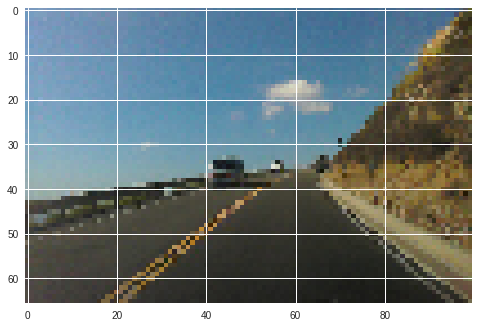

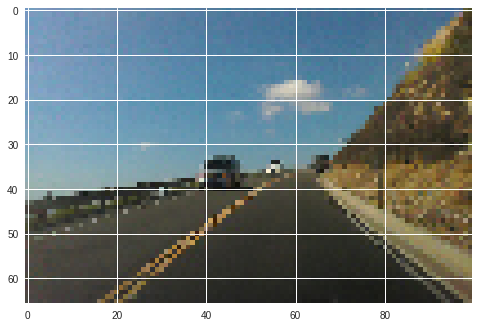

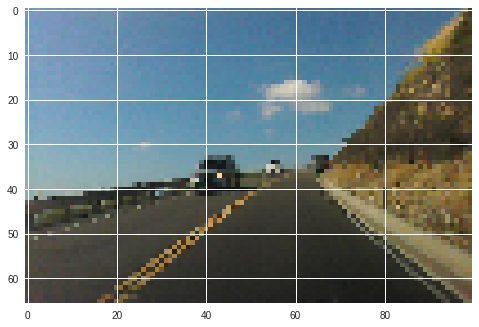

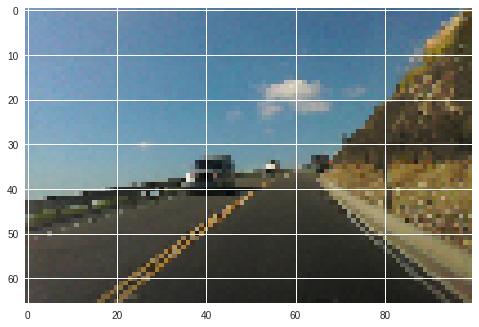

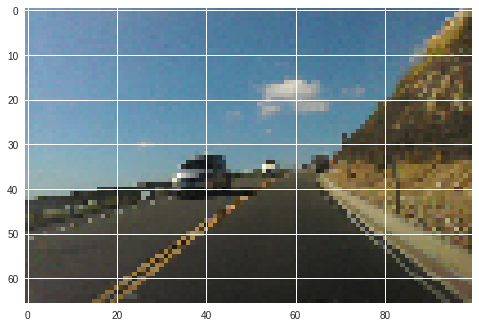

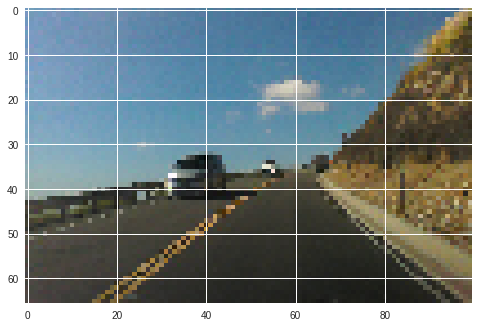

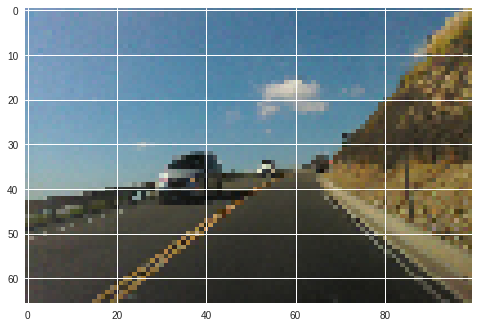

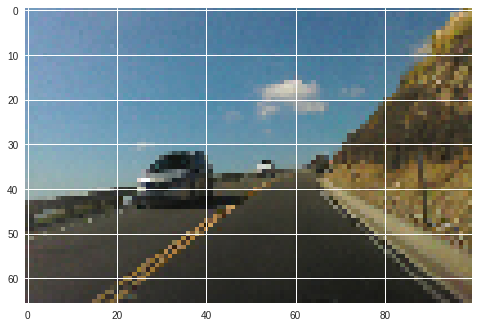

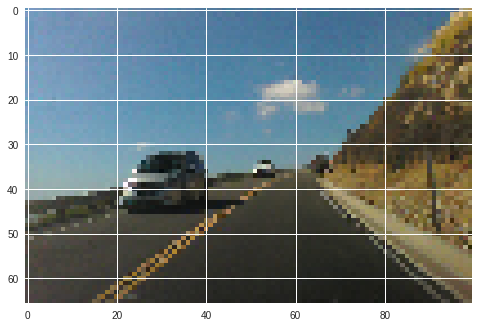

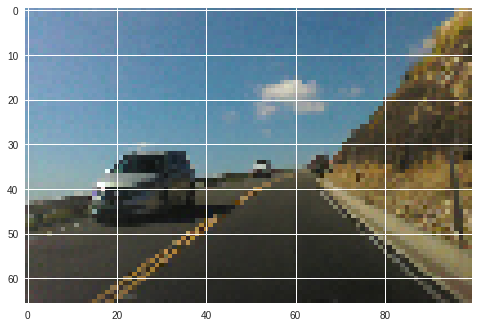

All validation images to array!


In [17]:
i = 0
for file in val_xs[:10]:
    img = load_img(file, target_size=(image_height, image_width)) # this is a PIL image(PIL- Python Imaging Libaray)
    # Convert to Numpy Array
    x = img_to_array(img)  
    #x = x.reshape((66,100,1)) ---> not required we have given target_size in load_img
    # Normalize
    x *= 1./255
    #print(x)
    val_dataset[i] = x
    plt.imshow(x)
    plt.show()
    i += 1
    
print("All validation images to array!")

In [0]:
# images preprocessing:-
train_datagen = ImageDataGenerator()
train_datagen.fit(train_dataset)
train_generator = train_datagen.flow(train_dataset,train_ys,batch_size=16)

val_datagen = ImageDataGenerator(rescale=1./255)
val_datagen.fit(val_dataset)
val_generator = train_datagen.flow(val_dataset,val_ys,batch_size=16)

<h1>4.1. Build Model</h1>

<h3>4.1. Build Small Model</h3>
<p>Nvidia Network Model is very deep model to execute it will take more time(depends upon cpu and gpu configuration)</p>
</p>so quickly builing one small ConvNet model to get more confidence </p>

In [0]:
# define variables will use in model section

input_size = (66,100,3)

In [0]:
#create small model 
def small_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu',input_shape=input_size))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1))
  return model

In [83]:
model = small_model()

# check model summarry
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 64, 98, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 49, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 30, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 15, 23, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 13, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 6, 10, 128)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 4, 8, 128)         147584    
__________

<h3>4.2 Configuring the model for training</h3>

In [0]:
model.compile(loss='mse',optimizer='adam',metrics=['acc'])

<h3>4.3 Fitting the model using a batch generator</h3>

In [86]:
history = model.fit_generator(train_generator,steps_per_epoch=2000,epochs=10,validation_data=val_generator,validation_steps=500)

Epoch 1/30
2000/2000 [==============================] - 45s 23ms/step - loss: 0.3306 - acc: 0.0554 - val_loss: 0.2752 - val_acc: 0.0280
Epoch 2/30
 464/2000 [=====>........................] - ETA: 34s - loss: 0.3616 - acc: 0.0492

2000/2000 [==============================] - 48s 24ms/step - loss: 0.3251 - acc: 0.0546 - val_loss: 0.2756 - val_acc: 0.0280
Epoch 3/30
 717/2000 [=========>....................] - ETA: 28s - loss: 0.3406 - acc: 0.0546

2000/2000 [==============================] - 48s 24ms/step - loss: 0.3403 - acc: 0.0547 - val_loss: 0.2755 - val_acc: 0.0280
Epoch 4/30
 806/2000 [===========>..................] - ETA: 26s - loss: 0.3187 - acc: 0.0551

2000/2000 [==============================] - 47s 23ms/step - loss: 0.3278 - acc: 0.0541 - val_loss: 0.2755 - val_acc: 0.0280
Epoch 5/30
 855/2000 [===========>..................] - ETA: 25s - loss: 0.3251 - acc: 0.0546

2000/2000 [==============================] - 48s 24ms/step - loss: 0.3303 - acc: 0.0559 - val_loss: 0.2752 - val_acc: 0.0280
Epoch 6/30
 857/2000 [===========>..................] - ETA: 25s - loss: 0.3265 - acc: 0.0532

2000/2000 [==============================] - 48s 24ms/step - loss: 0.3275 - acc: 0.0548 - val_loss: 0.2752 - val_acc: 0.0280
Epoch 7/30
 847/2000 [===========>..................] - ETA: 25s - loss: 0.3396 - acc: 0.0545

2000/2000 [==============================] - 48s 24ms/step - loss: 0.3244 - acc: 0.0553 - val_loss: 0.2748 - val_acc: 0.0280
Epoch 8/30
 861/2000 [===========>..................] - ETA: 25s - loss: 0.3383 - acc: 0.0548

2000/2000 [==============================] - 47s 24ms/step - loss: 0.3259 - acc: 0.0556 - val_loss: 0.2749 - val_acc: 0.0280
Epoch 9/30
 912/2000 [============>.................] - ETA: 23s - loss: 0.3365 - acc: 0.0542

2000/2000 [==============================] - 47s 23ms/step - loss: 0.3387 - acc: 0.0533 - val_loss: 0.2765 - val_acc: 0.0280
Epoch 10/30
 929/2000 [============>.................] - ETA: 23s - loss: 0.3072 - acc: 0.0568

2000/2000 [==============================] - 46s 23ms/step - loss: 0.3308 - acc: 0.0560 - val_loss: 0.2756 - val_acc: 0.0280
Epoch 11/30
 962/2000 [=============>................] - ETA: 22s - loss: 0.3228 - acc: 0.0565

2000/2000 [==============================] - 46s 23ms/step - loss: 0.3303 - acc: 0.0551 - val_loss: 0.2752 - val_acc: 0.0280
Epoch 12/30
 976/2000 [=============>................] - ETA: 21s - loss: 0.3273 - acc: 0.0541

2000/2000 [==============================] - 46s 23ms/step - loss: 0.3277 - acc: 0.0553 - val_loss: 0.2751 - val_acc: 0.0280
Epoch 13/30
 979/2000 [=============>................] - ETA: 21s - loss: 0.3318 - acc: 0.0553

2000/2000 [==============================] - 46s 23ms/step - loss: 0.3392 - acc: 0.0541 - val_loss: 0.2753 - val_acc: 0.0280
Epoch 14/30
 984/2000 [=============>................] - ETA: 21s - loss: 0.3316 - acc: 0.0551

2000/2000 [==============================] - 46s 23ms/step - loss: 0.3199 - acc: 0.0556 - val_loss: 0.2747 - val_acc: 0.0280
Epoch 15/30
 982/2000 [=============>................] - ETA: 21s - loss: 0.3364 - acc: 0.0545

2000/2000 [==============================] - 46s 23ms/step - loss: 0.3276 - acc: 0.0545 - val_loss: 0.2751 - val_acc: 0.0280
Epoch 16/30
 985/2000 [=============>................] - ETA: 21s - loss: 0.3446 - acc: 0.0553

2000/2000 [==============================] - 46s 23ms/step - loss: 0.3443 - acc: 0.0557 - val_loss: 0.2755 - val_acc: 0.0280
Epoch 17/30
 984/2000 [=============>................] - ETA: 21s - loss: 0.3022 - acc: 0.0513

2000/2000 [==============================] - 46s 23ms/step - loss: 0.3216 - acc: 0.0537 - val_loss: 0.2751 - val_acc: 0.0280
Epoch 18/30
 927/2000 [============>.................] - ETA: 23s - loss: 0.3258 - acc: 0.0586

2000/2000 [==============================] - 48s 24ms/step - loss: 0.3328 - acc: 0.0554 - val_loss: 0.2756 - val_acc: 0.0280
Epoch 19/30
 888/2000 [============>.................] - ETA: 24s - loss: 0.3160 - acc: 0.0572

2000/2000 [==============================] - 48s 24ms/step - loss: 0.3288 - acc: 0.0544 - val_loss: 0.2747 - val_acc: 0.0280
Epoch 20/30
 869/2000 [============>.................] - ETA: 25s - loss: 0.3152 - acc: 0.0586

2000/2000 [==============================] - 48s 24ms/step - loss: 0.3365 - acc: 0.0560 - val_loss: 0.2756 - val_acc: 0.0280
Epoch 21/30
 870/2000 [============>.................] - ETA: 24s - loss: 0.3153 - acc: 0.0537

2000/2000 [==============================] - 47s 24ms/step - loss: 0.3231 - acc: 0.0536 - val_loss: 0.2754 - val_acc: 0.0280
Epoch 22/30
 869/2000 [============>.................] - ETA: 25s - loss: 0.3196 - acc: 0.0569

2000/2000 [==============================] - 48s 24ms/step - loss: 0.3371 - acc: 0.0556 - val_loss: 0.2752 - val_acc: 0.0280
Epoch 23/30
 839/2000 [===========>..................] - ETA: 26s - loss: 0.3228 - acc: 0.0570

2000/2000 [==============================] - 48s 24ms/step - loss: 0.3235 - acc: 0.0552 - val_loss: 0.2749 - val_acc: 0.0280
Epoch 24/30
 834/2000 [===========>..................] - ETA: 25s - loss: 0.3314 - acc: 0.0542

2000/2000 [==============================] - 48s 24ms/step - loss: 0.3258 - acc: 0.0543 - val_loss: 0.2755 - val_acc: 0.0280
Epoch 25/30
 799/2000 [==========>...................] - ETA: 27s - loss: 0.3366 - acc: 0.0556

2000/2000 [==============================] - 49s 24ms/step - loss: 0.3404 - acc: 0.0558 - val_loss: 0.2771 - val_acc: 0.0280
Epoch 26/30
 788/2000 [==========>...................] - ETA: 27s - loss: 0.3077 - acc: 0.0550

2000/2000 [==============================] - 48s 24ms/step - loss: 0.3261 - acc: 0.0551 - val_loss: 0.2750 - val_acc: 0.0280
Epoch 27/30
 851/2000 [===========>..................] - ETA: 25s - loss: 0.3254 - acc: 0.0541

2000/2000 [==============================] - 48s 24ms/step - loss: 0.3282 - acc: 0.0539 - val_loss: 0.2752 - val_acc: 0.0280
Epoch 28/30
 919/2000 [============>.................] - ETA: 23s - loss: 0.3317 - acc: 0.0547

2000/2000 [==============================] - 47s 24ms/step - loss: 0.3379 - acc: 0.0550 - val_loss: 0.2750 - val_acc: 0.0280
Epoch 29/30
 944/2000 [=============>................] - ETA: 22s - loss: 0.3062 - acc: 0.0546

2000/2000 [==============================] - 47s 23ms/step - loss: 0.3218 - acc: 0.0557 - val_loss: 0.2755 - val_acc: 0.0280
Epoch 30/30
 918/2000 [============>.................] - ETA: 23s - loss: 0.3388 - acc: 0.0540

2000/2000 [==============================] - 48s 24ms/step - loss: 0.3322 - acc: 0.0550 - val_loss: 0.2756 - val_acc: 0.0280


<h3>4.4 Save Model</h3>

In [0]:
model.save("inceptionV3_style__model.h5")

<p>Observation:</p>
<p>On simple Deep network give us MSE loss 0.3218 on Train and 0.2755 on Validation set (Ephoch 30, batch size 16)</p>

<h3>4.5 Displaying curves of loss and accuracy during training</h3>

In [0]:
def display_perfomance(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()
  

<h1>InceptionNet V3 style Model</h1>
<p>As we know Inception net style network help to  save Memory cost and here we need Memory Convolution calculation smartly so as in less RAM and GPU we can train our model without reducing Data set </p>
<p>Refer: https://github.com/fchollet/deep-learning-models/blob/master/inception_v3.py</p>
<p>Refer: http://www.ashukumar27.io/CNN-Inception-Network/</p>

In [0]:
def conv2d_bn(x,
              filters,
              num_row,
              num_col,
              padding='same',
              strides=(1, 1),
              name=None):
    conv_name,bn_name = None,None
    if name is not None:
      conv_name = "conv_"+name
      bn_name = "bn_"+name
    
    x = Conv2D(
        filters, (num_row, num_col),
        strides=strides,
        padding=padding,
        use_bias=False,
        name=conv_name)(x)
    x = BatchNormalization(axis=3, scale=False, name=bn_name)(x)
    x = Activation('relu', name=name)(x)
    return x

In [0]:
def inception_v3_style_model(input_shape):
    img_input = Input(input_shape)
    x = conv2d_bn(img_input, 32, 3, 3, strides=(2, 2), padding='valid')
    x = conv2d_bn(x, 32, 3, 3, padding='valid')
    x = conv2d_bn(x, 64, 3, 3)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv2d_bn(x, 80, 1, 1, padding='valid')
    x = conv2d_bn(x, 192, 3, 3, padding='valid')
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # mixed 0, 1, 2: 35 x 35 x 256
    branch1x1 = conv2d_bn(x, 64, 1, 1)

    branch5x5 = conv2d_bn(x, 48, 1, 1)
    branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 32, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=3,
        name='mixed0')
    x=Flatten()(x)
    x=Dense(500,activation='relu')(x)
    x=Dropout(0.3)(x)
    x=Dense(100,activation='relu')(x)
    x=Dropout(0.3)(x)
    x=Dense(1)(x)
    
    model = Model(inputs=img_input, outputs=x)
    print(model.summary())
    return model

In [32]:
print("Model creation started")
model = inception_v3_style_model((66,100,3))
  
print("Model compile started")
model.compile(loss='mse',optimizer='adam',metrics=['acc'])
print("Model Fit started")
history = model.fit_generator(train_generator,steps_per_epoch=t_steps_per_e,epochs=ep,validation_data=val_generator,validation_steps=v_steps_per_e)

Model creation started
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 66, 100, 3)   0                                            
__________________________________________________________________________________________________
conv2d_61 (Conv2D)              (None, 32, 49, 32)   864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_61 (BatchNo (None, 32, 49, 32)   96          conv2d_61[0][0]                  
__________________________________________________________________________________________________
activation_61 (Activation)      (None, 32, 49, 32)   0           batch_normalization_61[0][0]     
______________________________________________________________________________________

1136/1702 [===================>..........] - ETA: 39s - loss: 0.5087 - acc: 0.0541

1702/1702 [==============================] - 124s 73ms/step - loss: 0.4469 - acc: 0.0535 - val_loss: 0.2743 - val_acc: 0.0278
Epoch 2/30
 222/1702 [==>...........................] - ETA: 1:25 - loss: 0.3856 - acc: 0.0556

1305/1702 [======================>.......] - ETA: 25s - loss: 0.3251 - acc: 0.0543

1702/1702 [==============================] - 119s 70ms/step - loss: 0.3307 - acc: 0.0550 - val_loss: 0.2748 - val_acc: 0.0278
Epoch 3/30
 281/1702 [===>..........................] - ETA: 1:27 - loss: 0.3602 - acc: 0.0560

1701/1702 [============================>.] - ETA: 0s - loss: 0.3294 - acc: 0.0549

1702/1702 [==============================] - 117s 69ms/step - loss: 0.3299 - acc: 0.0549 - val_loss: 0.2742 - val_acc: 0.0278
Epoch 4/30
 447/1702 [======>.......................] - ETA: 1:18 - loss: 0.3061 - acc: 0.0533

1563/1702 [==========================>...] - ETA: 9s - loss: 0.3302 - acc: 0.0548

1702/1702 [==============================] - 118s 70ms/step - loss: 0.3305 - acc: 0.0550 - val_loss: 0.2748 - val_acc: 0.0278
Epoch 5/30
 397/1702 [=====>........................] - ETA: 1:20 - loss: 0.3384 - acc: 0.0546

1494/1702 [=========================>....] - ETA: 13s - loss: 0.3327 - acc: 0.0542

1702/1702 [==============================] - 119s 70ms/step - loss: 0.3303 - acc: 0.0549 - val_loss: 0.2743 - val_acc: 0.0278
Epoch 6/30
 350/1702 [=====>........................] - ETA: 1:25 - loss: 0.3433 - acc: 0.0532

1465/1702 [========================>.....] - ETA: 15s - loss: 0.3247 - acc: 0.0549

1702/1702 [==============================] - 119s 70ms/step - loss: 0.3272 - acc: 0.0550 - val_loss: 0.2751 - val_acc: 0.0278
Epoch 7/30
 343/1702 [=====>........................] - ETA: 1:25 - loss: 0.4067 - acc: 0.0539

1509/1702 [=========================>....] - ETA: 12s - loss: 0.3395 - acc: 0.0543

1702/1702 [==============================] - 118s 69ms/step - loss: 0.3328 - acc: 0.0549 - val_loss: 0.2742 - val_acc: 0.0278
Epoch 8/30
 357/1702 [=====>........................] - ETA: 1:25 - loss: 0.3490 - acc: 0.0474

1536/1702 [==========================>...] - ETA: 10s - loss: 0.3320 - acc: 0.0546

1702/1702 [==============================] - 120s 70ms/step - loss: 0.3296 - acc: 0.0550 - val_loss: 0.2746 - val_acc: 0.0278
Epoch 9/30
 382/1702 [=====>........................] - ETA: 1:19 - loss: 0.3185 - acc: 0.0520

1519/1702 [=========================>....] - ETA: 11s - loss: 0.3287 - acc: 0.0558

1702/1702 [==============================] - 118s 69ms/step - loss: 0.3306 - acc: 0.0550 - val_loss: 0.2744 - val_acc: 0.0278
Epoch 10/30
 373/1702 [=====>........................] - ETA: 1:21 - loss: 0.2947 - acc: 0.0533

1562/1702 [==========================>...] - ETA: 8s - loss: 0.3335 - acc: 0.0549

1702/1702 [==============================] - 117s 69ms/step - loss: 0.3302 - acc: 0.0548 - val_loss: 0.2752 - val_acc: 0.0278
Epoch 11/30
 398/1702 [======>.......................] - ETA: 1:17 - loss: 0.3352 - acc: 0.0556

1627/1702 [===========================>..] - ETA: 4s - loss: 0.3319 - acc: 0.0543

1702/1702 [==============================] - 114s 67ms/step - loss: 0.3315 - acc: 0.0551 - val_loss: 0.2742 - val_acc: 0.0278
Epoch 12/30
 430/1702 [======>.......................] - ETA: 1:10 - loss: 0.3440 - acc: 0.0509

1630/1702 [===========================>..] - ETA: 4s - loss: 0.3304 - acc: 0.0545

1702/1702 [==============================] - 112s 66ms/step - loss: 0.3297 - acc: 0.0548 - val_loss: 0.2743 - val_acc: 0.0278
Epoch 13/30
 408/1702 [======>.......................] - ETA: 1:19 - loss: 0.3075 - acc: 0.0524

1592/1702 [===========================>..] - ETA: 7s - loss: 0.3278 - acc: 0.0548

1702/1702 [==============================] - 117s 68ms/step - loss: 0.3292 - acc: 0.0551 - val_loss: 0.2747 - val_acc: 0.0278
Epoch 14/30
 411/1702 [======>.......................] - ETA: 1:19 - loss: 0.2965 - acc: 0.0543

1593/1702 [===========================>..] - ETA: 6s - loss: 0.3257 - acc: 0.0558

1702/1702 [==============================] - 117s 69ms/step - loss: 0.3275 - acc: 0.0548 - val_loss: 0.2745 - val_acc: 0.0278
Epoch 15/30
 402/1702 [======>.......................] - ETA: 1:21 - loss: 0.3688 - acc: 0.0566

1604/1702 [===========================>..] - ETA: 6s - loss: 0.3321 - acc: 0.0554

1702/1702 [==============================] - 117s 69ms/step - loss: 0.3333 - acc: 0.0552 - val_loss: 0.2747 - val_acc: 0.0278
Epoch 16/30
 392/1702 [=====>........................] - ETA: 1:23 - loss: 0.3537 - acc: 0.0585

1537/1702 [==========================>...] - ETA: 10s - loss: 0.3357 - acc: 0.0548

1702/1702 [==============================] - 119s 70ms/step - loss: 0.3308 - acc: 0.0548 - val_loss: 0.2741 - val_acc: 0.0278
Epoch 17/30
 377/1702 [=====>........................] - ETA: 1:21 - loss: 0.3361 - acc: 0.0517

1482/1702 [=========================>....] - ETA: 14s - loss: 0.3285 - acc: 0.0549

1702/1702 [==============================] - 118s 70ms/step - loss: 0.3269 - acc: 0.0548 - val_loss: 0.2743 - val_acc: 0.0278
Epoch 18/30
 363/1702 [=====>........................] - ETA: 1:20 - loss: 0.3285 - acc: 0.0592

1508/1702 [=========================>....] - ETA: 12s - loss: 0.3339 - acc: 0.0549

1702/1702 [==============================] - 117s 69ms/step - loss: 0.3330 - acc: 0.0549 - val_loss: 0.2742 - val_acc: 0.0278
Epoch 19/30
 376/1702 [=====>........................] - ETA: 1:21 - loss: 0.3227 - acc: 0.0539

1478/1702 [=========================>....] - ETA: 14s - loss: 0.3230 - acc: 0.0544

1702/1702 [==============================] - 118s 70ms/step - loss: 0.3296 - acc: 0.0552 - val_loss: 0.2742 - val_acc: 0.0278
Epoch 20/30
 342/1702 [=====>........................] - ETA: 1:25 - loss: 0.3563 - acc: 0.0530

1451/1702 [========================>.....] - ETA: 16s - loss: 0.3376 - acc: 0.0547

1702/1702 [==============================] - 119s 70ms/step - loss: 0.3278 - acc: 0.0547 - val_loss: 0.2742 - val_acc: 0.0278
Epoch 21/30
 337/1702 [====>.........................] - ETA: 1:26 - loss: 0.3340 - acc: 0.0568

1546/1702 [==========================>...] - ETA: 10s - loss: 0.3367 - acc: 0.0552

1702/1702 [==============================] - 119s 70ms/step - loss: 0.3329 - acc: 0.0550 - val_loss: 0.2744 - val_acc: 0.0278
Epoch 22/30
 380/1702 [=====>........................] - ETA: 1:22 - loss: 0.2947 - acc: 0.0631

1494/1702 [=========================>....] - ETA: 13s - loss: 0.3305 - acc: 0.0553

1702/1702 [==============================] - 119s 70ms/step - loss: 0.3305 - acc: 0.0545 - val_loss: 0.2746 - val_acc: 0.0278
Epoch 23/30
 362/1702 [=====>........................] - ETA: 1:23 - loss: 0.3565 - acc: 0.0592

1701/1702 [============================>.] - ETA: 0s - loss: 0.3303 - acc: 0.0555

1702/1702 [==============================] - 117s 69ms/step - loss: 0.3302 - acc: 0.0554 - val_loss: 0.2744 - val_acc: 0.0278
Epoch 24/30
 455/1702 [=======>......................] - ETA: 1:15 - loss: 0.3208 - acc: 0.0565

1692/1702 [============================>.] - ETA: 0s - loss: 0.3280 - acc: 0.0549

1702/1702 [==============================] - 115s 68ms/step - loss: 0.3279 - acc: 0.0550 - val_loss: 0.2751 - val_acc: 0.0278
Epoch 25/30
 441/1702 [======>.......................] - ETA: 1:18 - loss: 0.3583 - acc: 0.0514

1609/1702 [===========================>..] - ETA: 5s - loss: 0.3356 - acc: 0.0547

1702/1702 [==============================] - 117s 69ms/step - loss: 0.3328 - acc: 0.0550 - val_loss: 0.2739 - val_acc: 0.0278
Epoch 26/30
 412/1702 [======>.......................] - ETA: 1:20 - loss: 0.3023 - acc: 0.0563

1583/1702 [==========================>...] - ETA: 7s - loss: 0.3251 - acc: 0.0552

1702/1702 [==============================] - 118s 69ms/step - loss: 0.3258 - acc: 0.0549 - val_loss: 0.2744 - val_acc: 0.0278
Epoch 27/30
 404/1702 [======>.......................] - ETA: 1:18 - loss: 0.3751 - acc: 0.0531

1618/1702 [===========================>..] - ETA: 5s - loss: 0.3357 - acc: 0.0543

1702/1702 [==============================] - 115s 68ms/step - loss: 0.3331 - acc: 0.0550 - val_loss: 0.2742 - val_acc: 0.0278
Epoch 28/30
 411/1702 [======>.......................] - ETA: 1:16 - loss: 0.3365 - acc: 0.0592

1524/1702 [=========================>....] - ETA: 11s - loss: 0.3275 - acc: 0.0548

1702/1702 [==============================] - 117s 69ms/step - loss: 0.3301 - acc: 0.0550 - val_loss: 0.2746 - val_acc: 0.0278
Epoch 29/30
 376/1702 [=====>........................] - ETA: 1:22 - loss: 0.3543 - acc: 0.0524

1688/1702 [============================>.] - ETA: 0s - loss: 0.3312 - acc: 0.0546

1702/1702 [==============================] - 116s 68ms/step - loss: 0.3310 - acc: 0.0548 - val_loss: 0.2744 - val_acc: 0.0278
Epoch 30/30
 446/1702 [======>.......................] - ETA: 1:15 - loss: 0.3141 - acc: 0.0577

1684/1702 [============================>.] - ETA: 1s - loss: 0.3294 - acc: 0.0549

1702/1702 [==============================] - 115s 68ms/step - loss: 0.3268 - acc: 0.0551 - val_loss: 0.2743 - val_acc: 0.0278


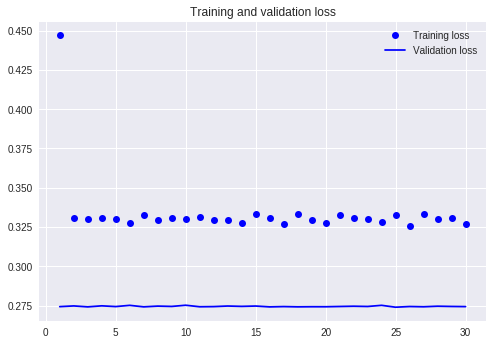

In [41]:
def display_perfomance(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()
  
display_perfomance(history)

<><>ss

In [0]:
def hyperparameter_tuning():
  print("Data Augumantation started")
  train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,shear_range=0.2)
  train_datagen.fit(train_dataset)
  train_generator = train_datagen.flow(train_dataset,train_ys,batch_size=bat_size)

  val_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,shear_range=0.2)
  val_datagen.fit(val_dataset)
  val_generator = train_datagen.flow(val_dataset,val_ys,batch_size=16)

  print("Model creation started")
  input_x=Input((66,100,3))
  base_model = InceptionV3(weights=None, include_top=False,pooling='max')
  x = base_model.get_layer("mixed1").output
  x = GlobalMaxPooling2D()(x)
  #x = Flatten()(x)
  x = Dense(1024, activation='relu')(x)
  x = Dense(256, activation='relu')(x)
  x = Dense(1)(x)
  model = Model(base_model.input,x)
  
  print("Model compile started")
  
  model.compile(loss='mse',optimizer='adam',metrics=['acc'])
  print("Model Fit started")

  history = model.fit_generator(train_generator,steps_per_epoch=t_steps_per_e,epochs=ep,validation_data=val_generator,validation_steps=v_steps_per_e)

In [0]:

base_model = InceptionV3(weights=None, include_top=False,pooling='max')
x = base_model.get_layer("mixed1").output
x = GlobalMaxPooling2D()(x)
#x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(1)(x)
model = Model(base_model.input,x)
model.summary()

In [6]:
base_model = InceptionV3(weights=None, include_top=False,pooling='max')
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, None, None, 3 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, None, None, 3 0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

In [25]:
bat_size=16
t_steps_per_e=int(len(train_dataset)/bat_size)
v_steps_per_e=int(len(val_dataset)/bat_size)
ep=5
hyperparameter_tuning()

Data Augumantation started
Model creation started
Model compile started
Model Fit started
Epoch 1/5
 544/1702 [========>.....................] - ETA: 2:31 - loss: 0.5464 - acc: 0.0478

1702/1702 [==============================] - 188s 111ms/step - loss: 0.4024 - acc: 0.0531 - val_loss: 0.2853 - val_acc: 0.0279
Epoch 2/5
  20/1702 [..............................] - ETA: 2:14 - loss: 0.4268 - acc: 0.0469

1701/1702 [============================>.] - ETA: 0s - loss: 0.3307 - acc: 0.0550

1702/1702 [==============================] - 157s 92ms/step - loss: 0.3305 - acc: 0.0550 - val_loss: 0.2890 - val_acc: 0.0279
Epoch 3/5
 455/1702 [=======>......................] - ETA: 1:37 - loss: 0.3136 - acc: 0.0577

1701/1702 [============================>.] - ETA: 0s - loss: 0.3303 - acc: 0.0550

1702/1702 [==============================] - 157s 92ms/step - loss: 0.3301 - acc: 0.0550 - val_loss: 0.2866 - val_acc: 0.0279
Epoch 4/5
 455/1702 [=======>......................] - ETA: 1:37 - loss: 0.3251 - acc: 0.0538

1701/1702 [============================>.] - ETA: 0s - loss: 0.3306 - acc: 0.0549

1702/1702 [==============================] - 157s 92ms/step - loss: 0.3307 - acc: 0.0550 - val_loss: 0.2809 - val_acc: 0.0279
Epoch 5/5
 455/1702 [=======>......................] - ETA: 1:36 - loss: 0.3361 - acc: 0.0549

1701/1702 [============================>.] - ETA: 0s - loss: 0.3300 - acc: 0.0549

1702/1702 [==============================] - 157s 92ms/step - loss: 0.3301 - acc: 0.0549 - val_loss: 0.2823 - val_acc: 0.0279


In [0]:

def hyperparameter_tuning():
  print("Data Augumantation started")
  train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,shear_range=0.2)
  train_datagen.fit(train_dataset)
  train_generator = train_datagen.flow(train_dataset,train_ys,batch_size=bat_size)

  val_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,shear_range=0.2)
  val_datagen.fit(val_dataset)
  val_generator = train_datagen.flow(val_dataset,val_ys,batch_size=16)

  print("Model creation started")
  model = inception_v3_style_model((66,100,3))
  
  print("Model compile started")
  model.compile(loss='mse',optimizer='adam',metrics=['acc'])
  print("Model Fit started")
  history = model.fit_generator(train_generator,steps_per_epoch=t_steps_per_e,epochs=ep,validation_data=val_generator,validation_steps=v_steps_per_e)

In [0]:
bat_size=16
t_steps_per_e=int(len(train_dataset)/bat_size)
v_steps_per_e=int(len(val_dataset)/bat_size)
ep=30
hyperparameter_tuning()

<h3>5.1. Build Nvidia Style Model</h3>
<p>Network Architecture of Nvidia, i wlll follow and will do some experiment on top up that link will add Dropout,BatchNormalization as next task etc</p>

In [0]:
# define variables will use in model section

input_size = (66,100,3)


In [0]:
#create small model 
def create_model():
  model = Sequential()
  model.add(Conv2D(12, (1, 1), activation='relu',input_shape=input_size)) #inception layer
  model.add(Conv2D(24, (5, 5), activation='relu',use_bias=True,
            kernel_initializer='he_uniform', bias_initializer='he_uniform', 
            kernel_regularizer=l2(1.e-4), bias_regularizer=l2(1.e-4)))
  model.add(Conv2D(18, (1, 1), activation='relu'))
  model.add(Conv2D(36, (5, 5), activation='relu',use_bias=True,
            kernel_initializer='he_uniform', bias_initializer='he_uniform', 
            kernel_regularizer=l2(1.e-4), bias_regularizer=l2(1.e-4)))
  model.add(Conv2D(18, (1, 1), activation='relu'))
  model.add(Conv2D(48, (5, 5), activation='relu',use_bias=True,
            kernel_initializer='he_uniform', bias_initializer='he_uniform', 
            kernel_regularizer=l2(1.e-4), bias_regularizer=l2(1.e-4)))
  model.add(Conv2D(18, (1, 1), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu',use_bias=True,
            kernel_initializer='he_uniform', bias_initializer='he_uniform', 
            kernel_regularizer=l2(1.e-4), bias_regularizer=l2(1.e-4)))
  model.add(Conv2D(18, (1, 1), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu',use_bias=True,
            kernel_initializer='he_uniform', bias_initializer='he_uniform', 
            kernel_regularizer=l2(1.e-4), bias_regularizer=l2(1.e-4)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu',use_bias=True,
            kernel_initializer='he_uniform', bias_initializer='he_uniform', 
            kernel_regularizer=l2(1.e-4), bias_regularizer=l2(1.e-4)))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation='relu',use_bias=True,
            kernel_initializer='he_uniform', bias_initializer='he_uniform', 
            kernel_regularizer=l2(1.e-4), bias_regularizer=l2(1.e-4)))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='relu',use_bias=True,
            kernel_initializer='he_uniform', bias_initializer='he_uniform', 
            kernel_regularizer=l2(1.e-4), bias_regularizer=l2(1.e-4)))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='tanh'))
  return model

In [0]:
def hyperparameter_tuning(bat_size,t_steps_per_e,v_steps_per_e,ep):
  print("Data Augumantation started")
  train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,shear_range=0.2)
  train_datagen.fit(train_dataset)
  train_generator = train_datagen.flow(train_dataset,train_ys,batch_size=bat_size)

  val_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,shear_range=0.2)
  val_datagen.fit(val_dataset)
  val_generator = train_datagen.flow(val_dataset,val_ys,batch_size=16)

  print("Model creation started")
  
  model = create_model()
  #model.summary()
  print("Model compile started")
  
  adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=0.0001, decay=0.0, amsgrad=False)
  model.compile(loss='mse',optimizer=adam,metrics=['acc'])
  print("Model Fit started")

  history = model.fit_generator(train_generator,steps_per_epoch=t_steps_per_e,epochs=ep,validation_data=val_generator,validation_steps=v_steps_per_e)

In [0]:
def train(bat_size):
  bat_size=bat_size
  t_steps_per_e=int(len(train_dataset)/bat_size)
  v_steps_per_e=int(len(val_dataset)/bat_size)
  ep=5
  hyperparameter_tuning(bat_size,t_steps_per_e,v_steps_per_e,ep)

for i in [64,32,16,8]:
  print("Training on : "+str(i))
  train(i)

 

Training on : 64
Data Augumantation started
Model creation started
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 66, 100, 12)       48        
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 62, 96, 24)        7224      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 62, 96, 18)        450       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 58, 92, 36)        16236     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 58, 92, 18)        666       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 54, 88, 48)        21648     
_________________________________________________________________
conv2d_27

425/425 [==============================] - 121s 285ms/step - loss: 1.6772 - acc: 0.0187 - val_loss: 0.3542 - val_acc: 0.0279
Epoch 2/5
316/425 [=====================>........] - ETA: 27s - loss: 0.9874 - acc: 0.0253

425/425 [==============================] - 112s 264ms/step - loss: 0.9525 - acc: 0.0266 - val_loss: 0.3415 - val_acc: 0.0279
Epoch 3/5
422/425 [============================>.] - ETA: 0s - loss: 0.6969 - acc: 0.0357

425/425 [==============================] - 112s 264ms/step - loss: 0.6958 - acc: 0.0358 - val_loss: 0.3324 - val_acc: 0.0279
Epoch 4/5
425/425 [==============================] - 112s 264ms/step - loss: 0.5664 - acc: 0.0432 - val_loss: 0.3304 - val_acc: 0.0279
Epoch 5/5
 21/425 [>.............................] - ETA: 1:39 - loss: 0.4400 - acc: 0.0499

425/425 [==============================] - 111s 262ms/step - loss: 0.4993 - acc: 0.0472 - val_loss: 0.3199 - val_acc: 0.0279
Training on : 32
Data Augumantation started
Model creation started
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 66, 100, 12)       48        
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 62, 96, 24)        7224      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 62, 96, 18)        450       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 58, 92, 36)        16236     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 58, 92, 18)        666       
_________________________________________________________________
conv2d_36 (Conv2

851/851 [==============================] - 169s 198ms/step - loss: 2.3682 - acc: 0.0223 - val_loss: 0.4106 - val_acc: 0.0276
Epoch 2/5
152/851 [====>.........................] - ETA: 2:02 - loss: 1.1139 - acc: 0.0290

851/851 [==============================] - 163s 192ms/step - loss: 0.8474 - acc: 0.0351 - val_loss: 0.3169 - val_acc: 0.0276
Epoch 3/5
202/851 [======>.......................] - ETA: 1:54 - loss: 0.5963 - acc: 0.0413

851/851 [==============================] - 164s 192ms/step - loss: 0.5971 - acc: 0.0424 - val_loss: 0.3233 - val_acc: 0.0276
Epoch 4/5
220/851 [======>.......................] - ETA: 1:50 - loss: 0.5092 - acc: 0.0487

851/851 [==============================] - 163s 191ms/step - loss: 0.5143 - acc: 0.0476 - val_loss: 0.3224 - val_acc: 0.0276
Epoch 5/5
227/851 [=======>......................] - ETA: 1:49 - loss: 0.4809 - acc: 0.0490

851/851 [==============================] - 163s 192ms/step - loss: 0.4730 - acc: 0.0481 - val_loss: 0.3215 - val_acc: 0.0276
Training on : 16
Data Augumantation started
Model creation started
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 66, 100, 12)       48        
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 62, 96, 24)        7224      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 62, 96, 18)        450       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 58, 92, 36)        16236     
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 58, 92, 18)        666       
_________________________________________________________________
conv2d_46 (Conv2

1701/1702 [============================>.] - ETA: 0s - loss: 1.3561 - acc: 0.0266

1702/1702 [==============================] - 269s 158ms/step - loss: 1.3559 - acc: 0.0266 - val_loss: 0.3320 - val_acc: 0.0278
Epoch 2/5
 453/1702 [======>.......................] - ETA: 2:53 - loss: 0.6765 - acc: 0.0328

1701/1702 [============================>.] - ETA: 0s - loss: 0.5935 - acc: 0.0400

1702/1702 [==============================] - 262s 154ms/step - loss: 0.5935 - acc: 0.0400 - val_loss: 0.3123 - val_acc: 0.0278
Epoch 3/5
 453/1702 [======>.......................] - ETA: 2:53 - loss: 0.5237 - acc: 0.0457

1701/1702 [============================>.] - ETA: 0s - loss: 0.4792 - acc: 0.0477

1702/1702 [==============================] - 263s 155ms/step - loss: 0.4791 - acc: 0.0477 - val_loss: 0.3117 - val_acc: 0.0278
Epoch 4/5
 453/1702 [======>.......................] - ETA: 2:53 - loss: 0.4346 - acc: 0.0477

1701/1702 [============================>.] - ETA: 0s - loss: 0.4349 - acc: 0.0501

1702/1702 [==============================] - 263s 155ms/step - loss: 0.4347 - acc: 0.0502 - val_loss: 0.3135 - val_acc: 0.0278
Epoch 5/5
 453/1702 [======>.......................] - ETA: 2:53 - loss: 0.4420 - acc: 0.0491

1701/1702 [============================>.] - ETA: 0s - loss: 0.4175 - acc: 0.0526

1702/1702 [==============================] - 263s 154ms/step - loss: 0.4174 - acc: 0.0526 - val_loss: 0.3116 - val_acc: 0.0278
Training on : 8
Data Augumantation started
Model creation started
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 66, 100, 12)       48        
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 62, 96, 24)        7224      
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 62, 96, 18)        450       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 58, 92, 36)        16236     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 58, 92, 18)        666       
_________________________________________________________________
conv2d_56 (Conv

3404/3405 [============================>.] - ETA: 0s - loss: 2.0554 - acc: 0.0218

3405/3405 [==============================] - 461s 135ms/step - loss: 2.0550 - acc: 0.0218 - val_loss: 0.3091 - val_acc: 0.0279
Epoch 2/5
 283/3405 [=>............................] - ETA: 6:04 - loss: 0.9394 - acc: 0.0274

In [10]:
bat_size=16
t_steps_per_e=int(len(train_dataset)/bat_size)
v_steps_per_e=int(len(val_dataset)/bat_size)
ep=30
hyperparameter_tuning(bat_size,t_steps_per_e,v_steps_per_e,ep)

Data Augumantation started
Model creation started
Model compile started
Model Fit started
Epoch 1/30
72/72 [==============================] - 112s 2s/step - loss: 2.1820 - acc: 0.0238 - val_loss: 0.3850 - val_acc: 0.0417
Epoch 2/30
72/72 [==============================] - 105s 1s/step - loss: 1.3190 - acc: 0.0277 - val_loss: 0.3381 - val_acc: 0.0417
Epoch 3/30
72/72 [==============================] - 105s 1s/step - loss: 1.2174 - acc: 0.0276 - val_loss: 0.2900 - val_acc: 0.0417
Epoch 4/30
54/72 [=====================>........] - ETA: 25s - loss: 1.0953 - acc: 0.0288

72/72 [==============================] - 105s 1s/step - loss: 1.0828 - acc: 0.0289 - val_loss: 0.3198 - val_acc: 0.0417
Epoch 5/30
72/72 [==============================] - 105s 1s/step - loss: 1.0053 - acc: 0.0311 - val_loss: 0.2783 - val_acc: 0.0417
Epoch 6/30
72/72 [==============================] - 105s 1s/step - loss: 0.9364 - acc: 0.0320 - val_loss: 0.2741 - val_acc: 0.0417
Epoch 7/30
72/72 [==============================] - 105s 1s/step - loss: 0.8552 - acc: 0.0336 - val_loss: 0.2763 - val_acc: 0.0417
Epoch 8/30
16/72 [=====>........................] - ETA: 1:19 - loss: 0.8114 - acc: 0.0314

KeyboardInterrupt: ignored

In [0]:
bat_size=64
t_steps_per_e=int(len(train_dataset)/bat_size)
v_steps_per_e=int(len(val_dataset)/bat_size)
ep=100
hyperparameter_tuning(bat_size,t_steps_per_e,v_steps_per_e,ep)

<h3>5.2 Configuring the model for training</h3>

In [0]:
model.compile(loss='mse',optimizer='adam',metrics=['acc'])

In [0]:
# Rescal all images by 1./255
train_datagen = ImageDataGenerator()
train_datagen.fit(train_dataset)
train_generator = train_datagen.flow(train_dataset,train_ys,batch_size=1)

val_datagen = ImageDataGenerator(rescale=1./255)
val_datagen.fit(val_dataset)
val_generator = train_datagen.flow(val_dataset,val_ys,batch_size=1)

<h3>5.3 Fitting the model using a batch generator</h3>

In [0]:
history = model.fit_generator(train_generator,steps_per_epoch=300,epochs=1,validation_data=val_generator,validation_steps=90)

<h3>5.4 Save Model</h3>

In [0]:
model.save("nvidia_self_car_model.h5")

In [1]:
!ps -ah

30892 pts/0    Ss+    0:00 /bin/sh -c ps -ah
30893 pts/0    R+     0:00 ps -ah


In [10]:
image_height=66
image_width=100
channels = 3

train_dataset = np.ndarray(shape=(len(train_xs), image_height, image_width, channels),
                     dtype=np.float32)
val_dataset = np.ndarray(shape=(len(val_xs), image_height, image_width, channels),
                     dtype=np.float32)
test_dataset = np.ndarray(shape=(len(test_xs), image_height, image_width, channels),
                     dtype=np.float32)

i = 0
for file in train_xs[:10]:
    img = load_img(file, target_size=(image_height, image_width)) # this is a PIL image(PIL- Python Imaging Libaray)
    # Convert to Numpy Array
    x = img_to_array(img)  
    #x = x.reshape((66,100,1)) ---> not required we have given target_size in load_img
    # Normalize
    x *= 1./255
    train_dataset[i] = x
    i += 1
    if i % 10000 == 0:
        print("%d images to array" % i)
print("All Train images to array!")



All Train images to array!


In [7]:
i = 0
for file in train_xs[:10]:
    img = load_img(file, target_size=(66, 100)) # this is a PIL image(PIL- Python Imaging Libaray)
    # Convert to Numpy Array
    x = img_to_array(img)  
    #x = x.reshape((66,100,1)) ---> not required we have given target_size in load_img
    # Normalize
    x *= 1./255
    #print(x)
    val_dataset[i] = x
    plt.imshow(x)
    plt.show()
    i += 1
    
print("All validation images to array!")

NameError: ignored

In [0]:
# images preprocessing:-
train_datagen = ImageDataGenerator()
train_datagen.fit(train_dataset)
train_generator = train_datagen.flow(train_dataset,train_ys,batch_size=1)


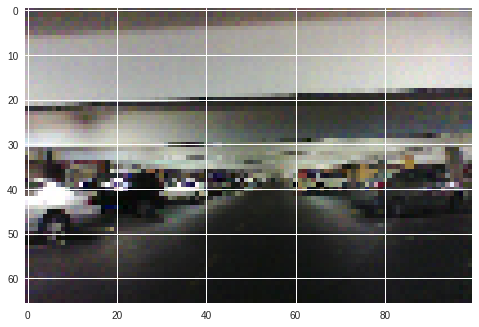

In [11]:
    plt.imshow(train_dataset[1])
    plt.show()